-Labb databehandling

In [3]:
#a:

import pandas as pd
import csv as csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

college = pd.read_csv("College.csv", index_col=0)

In [4]:
#b:

college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [13]:
#c:

college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


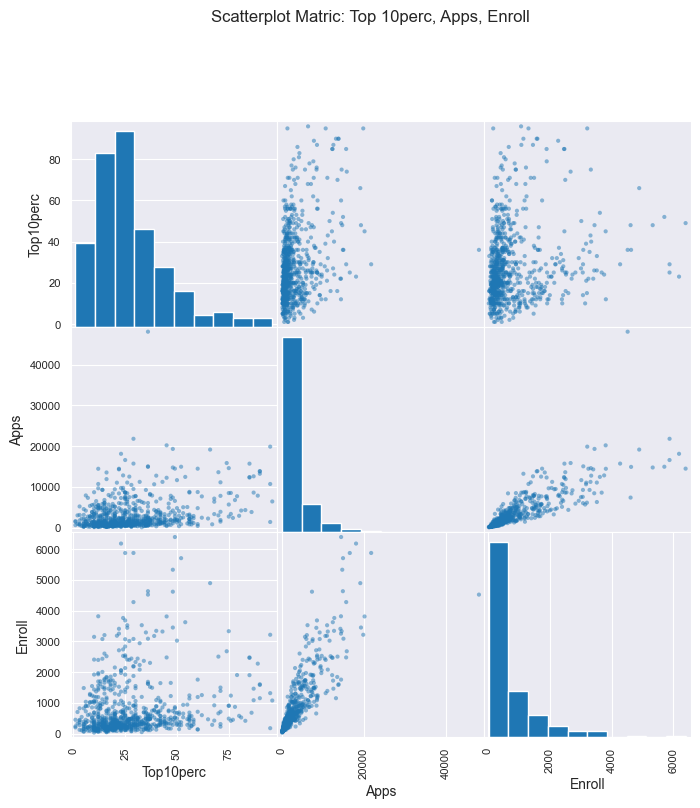

In [6]:
#d:

from pandas.plotting import scatter_matrix

scatter_matrix(college[["Top10perc", "Apps", "Enroll"]], figsize=(8, 8), diagonal="hist")
plt.suptitle("Scatterplot Matric: Top 10perc, Apps, Enroll", y=1.02)
plt.show()

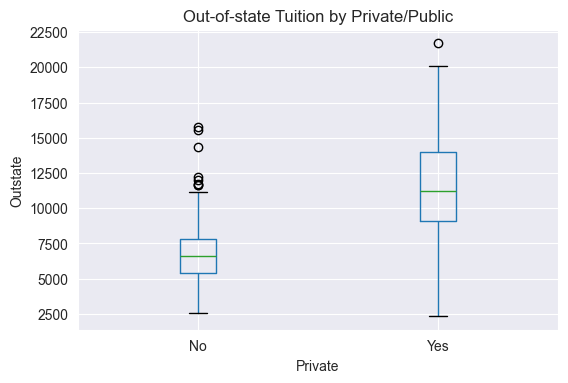

In [7]:
#e:

college.boxplot(column="Outstate", by="Private", figsize=(6, 4))
plt.title("Out-of-state Tuition by Private/Public")
plt.suptitle("")
plt.xlabel("Private")
plt.ylabel("Outstate")
plt.show()

Elite
No     699
Yes     78
Name: count, dtype: int64


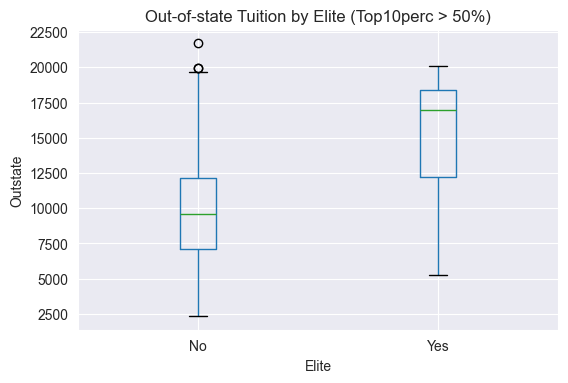

In [8]:
#f:
import pandas as pd
college["Elite"] = pd.cut(college["Top10perc"], bins=[0, 50, 100], labels=["No", "Yes"])
print(college["Elite"].value_counts())

college.boxplot(column="Outstate", by="Elite", figsize=(6, 4))
plt.title("Out-of-state Tuition by Elite (Top10perc > 50%)")
plt.suptitle("")
plt.xlabel("Elite")
plt.ylabel("Outstate")
plt.show()

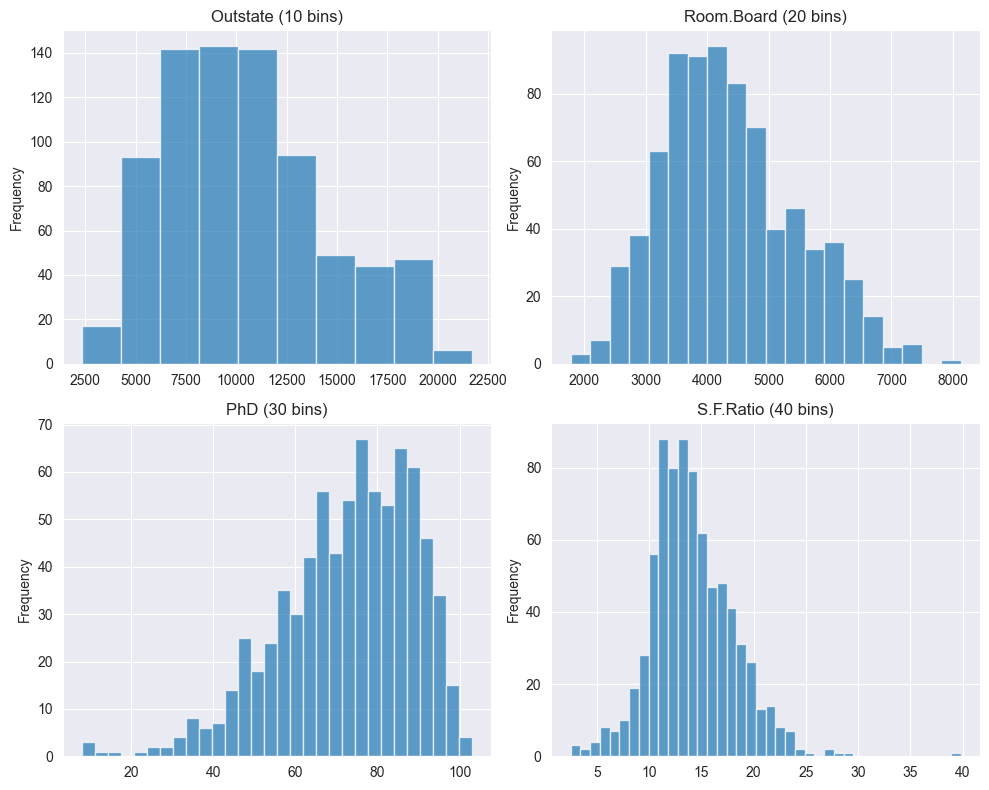

In [9]:
#g:

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
vars_to_plot = ["Outstate", "Room.Board", "PhD", "S.F.Ratio"]

bins = [10, 20, 30 ,40]

for ax, var, b in zip(axes.ravel(), vars_to_plot, bins):
    college[var].plot.hist(bins=b, ax=ax, alpha=0.7)
    ax.set_title(f"{var} ({b} bins)")
plt.tight_layout()
plt.show()

             Personal    Expend  Outstate  Grad.Rate  perc.alumni
Personal     1.000000 -0.097892 -0.299087  -0.269344    -0.285968
Expend      -0.097892  1.000000  0.672779   0.390343     0.417712
Outstate    -0.299087  0.672779  1.000000   0.571290     0.566262
Grad.Rate   -0.269344  0.390343  0.571290   1.000000     0.490898
perc.alumni -0.285968  0.417712  0.566262   0.490898     1.000000


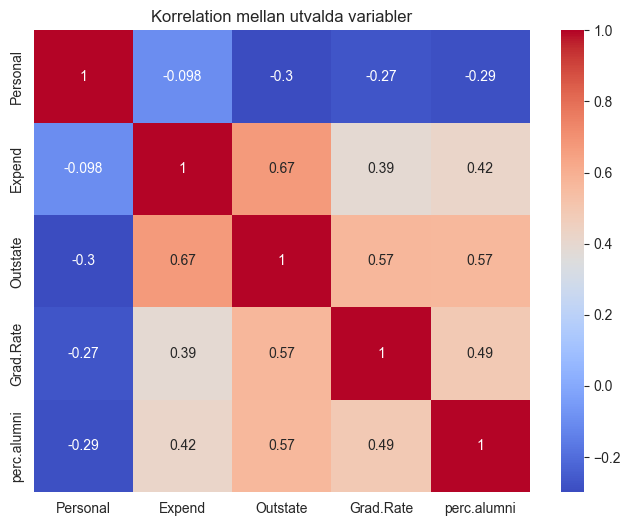

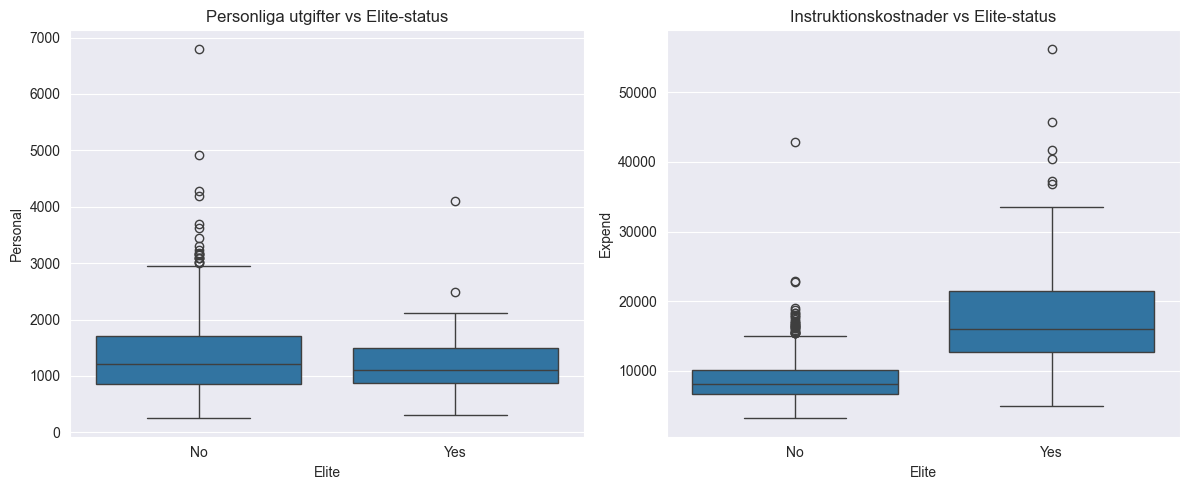

          Personal        Expend      Outstate  Grad.Rate
Elite                                                    
No     1357.655222   8684.367668   9904.165951  63.463519
Yes    1188.179487  18404.871795  15248.564103  83.384615


C:\Users\hamid\AppData\Local\Temp\ipykernel_6604\3240866492.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(college.groupby('Elite')[['Personal', 'Expend', 'Outstate', 'Grad.Rate']].mean())


In [11]:
#h:
corr_vars = ['Personal', 'Expend', 'Outstate', 'Grad.Rate', 'perc.alumni']
corr_matrix = college[corr_vars].corr()
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') #Tog hjälp av Chat med heatmap, tyckte det såg snyggare ut.
plt.title("Korrelation mellan utvalda variabler")
plt.show()

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Elite', y='Personal', data=college)
plt.title("Personliga utgifter vs Elite-status")

plt.subplot(1, 2, 2)
sns.boxplot(x='Elite', y='Expend', data=college)
plt.title("Instruktionskostnader vs Elite-status")

plt.tight_layout()
plt.show()

print(college.groupby('Elite')[['Personal', 'Expend', 'Outstate', 'Grad.Rate']].mean())

In [ ]:
# Jag fortsatte att utforska datan för att se om det fanns några samband mellan studenternas personliga utgifter, undervisningskostnader (Expend) och om universitetet klassas som Elite, det vill säga när fler än hälften av studenterna kommer från den översta 10 % av sin gymnasieklass.

# Analysen visade en lagom positiv korrelation mellan Personal och Expend, vilket innebär att högre undervisningskostnader ofta hänger ihop med att studenterna har större personliga utgifter.

# När jag jämförde Elite-universitet med övriga framgick det att de generellt har högre undervisningskostnader (Expend), högre avgifter för studenter utanför delstaten (Outstate) och en något högre examensgrad (Graduation Rate).

# Skillnaden i personliga utgifter var däremot mindre tydlig, vilket tyder på att dessa inte påverkas lika starkt av om universitetet är Elite eller inte.

# Sammanfattningsvis verkar Elite-universitet investera mer resurser i undervisningen och ta ut högre avgifter, medan studenternas personliga utgifter varierar mer oberoende av skolans status. Detta är bara en tolkning baserad på tillgänglig data, och det finns förstås många andra faktorer som kan påverka utfallet.